In [253]:
# Let's refine the text function.
using Compose
function Text(label,x,y,stroke,size)
    color = string("\"",string(stroke),"\"")
    label = string("\"",string(label),"\"")
    tag = string("text(",x, ",", y, ",", label, ",hcenter, vcenter),",
        "stroke(", color,
        "), fontsize(", size, "),")
    expression = string("compose(context(), ",tag,")")
    exp = Meta.parse(expression)
    show() = eval(exp)
    update() = tag
    (var)->(show;expression;tag;exp)
end

Text (generic function with 1 method)

In [254]:
function Label(label,x,y,stroke="",size=5,fill=:gray)
    if stroke != ""
        stroke = string("stroke(","\"",string(stroke),"\"","),")
    end
    fill = string("\"", string(fill), "\"")
    label = string("\"",string(label),"\"")
    tag = string("text(",x, ",", y, ",", label, ",hcenter, vcenter),",
           stroke," fontsize(", size, "), fill(", fill, "),")
    expression = string("compose(context(), ",tag,")")
    exp = Meta.parse(expression)
    show() = eval(exp)
    update() = tag
    (var)->(show;expression;tag;exp)
end

Label (generic function with 4 methods)

In [255]:
h = Label("Test",.5,.5)

#269 (generic function with 1 method)

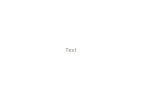

In [256]:
h.show()

In [257]:
# Let's add labels to our grids. To do this, we'll need
function Grid(divisions,frame=Frame(1280,720,0mm,0mm,0mm,0mm),colorx=:lightblue,colory=:lightblue,thickness=.2)
    xlen = frame.width
    ylen = frame.height
    division_amountx = xlen / divisions
    division_amounty = ylen / divisions
    total = 0
    Xexpression = "(context(), "
    while total < xlen
        total = total + division_amountx
        linedraw = Line([(0,total),(xlen,total)],:lightblue,thickness)
        exp = linedraw.update(:This_symbol_means_nothing)
        Xexpression = string(Xexpression,string(exp))
    end
    Xexpression = string(Xexpression, "),")
    total = 0
    Yexpression = "(context(),"
    while total < ylen
        total = total + division_amounty
        linedraw = Line([(total,0),(total,ylen)],:lightblue,thickness)
        exp = linedraw.update(:hi)
        Yexpression = string(Yexpression,string(exp))
    end
    composexp = string(string(Xexpression), string(Yexpression),"),")
    vv = Meta.parse(string("compose(context(),",composexp,")"))
    composition = eval(vv)
    save(name) = draw(SVG(name), composition);
    update() = string(composexp)
    show() = composition
    tag() = composexp
    (var)->(update;composexp;show;save;tag;division_amountx;division_amounty;frame;divisions)
end

Grid (generic function with 5 methods)

In [258]:
function _arrayscatter(x,y,shape=Circle(.5,.5,25),axiscolor=:lightblue,
     grid=Grid(3), frame=Frame(1280,720,0mm,0mm,0mm,0mm))
    buffer = 90
    fheight = frame.height - buffer
    fwidth = frame.width - buffer
   topx = maximum(x)
    topy = maximum(y)
    axisx = Line([(buffer,fheight), (fwidth,fheight)],axiscolor)
   axisx_tag = axisx.update([(-1,-1), (-1,1), (1,1)])
    axisy = Line([(buffer,0), (buffer,fheight)],axiscolor)
    axisy_tag = axisy.update([(0,0), (0,1), (0,1)])
    ######
    ######
    expression = string("")
    # Coordinate parsing -------
    for (i, w) in zip(x, y)
        inputx = (i / topx) * fwidth
        inputy = (w / topy) * fheight
        exp = shape.update(inputx,inputy)
        expression = string(expression,string(exp))
    end
    expression = string(expression, "(context(),", axisx_tag, axisy_tag,"),")
    tt = transfertype(expression)
    frame.add(tt)
    frame.add(grid.tag())
    composition = eval(expression)
    show() = frame.show()
    tree() = introspect(composition)
    save(name) = draw(SVG(name), composition);
    get_frame() = frame
    add(obj) = frame.add(obj)
    (var)->(show;composition;tree;save;get_frame;add;x;y)
end

_arrayscatter (generic function with 6 methods)

In [259]:
x = [5,10,15,20,25,30,35,40]

8-element Array{Int64,1}:
  5
 10
 15
 20
 25
 30
 35
 40

In [260]:
y = [5,10,1,2,17,35,23,2]

8-element Array{Int64,1}:
  5
 10
  1
  2
 17
 35
 23
  2

In [261]:
using Hone: Circle, Frame, Line, transfertype

In [262]:
plt = _arrayscatter(x,y,Circle(.5,.5,15,:blue))

objects: (context(),circle(148.75,90.0,15), fill("blue"), stroke("black"),circle(297.5,180.0,15), fill("blue"), stroke("black"),circle(446.25,18.0,15), fill("blue"), stroke("black"),circle(595.0,36.0,15), fill("blue"), stroke("black"),circle(743.75,306.0,15), fill("blue"), stroke("black"),circle(892.5,630.0,15), fill("blue"), stroke("black"),circle(1041.25,414.0,15), fill("blue"), stroke("black"),circle(1190.0,36.0,15), fill("blue"), stroke("black"),(context(),line([(90, 630),(1190, 630),]), stroke("lightblue"), linewidth(2mm),line([(90, 0),(90, 630),]), stroke("lightblue"), linewidth(2mm),),),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), circle(148.75, 90.0, 15), fill("blue"), stroke("black"), circle(297.5, 180.0, 15), fill("blue"), stroke("black"), circle(446.25, 18.0, 15), fill("blue"), stroke("black"), circle(595.0, 36.0, 15), fill("blue"), stroke("black"), circle(743.75, 306.0, 15), fill("blue"), stroke("black"), circle(892.5, 630.0, 1

ErrorException: type String has no field tag

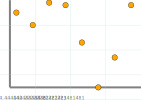

In [263]:
plt.show()

In [264]:
function GridLabels(x,y,grid,label,buffer=20)
   frame = grid.frame
    divamountx = grid.division_amountx
    total = divamountx
    topx = maximum(x)
    topy = maximum(y)
    xlabels = []
    while total < (divamountx * grid.divisions)
        xpercentage = frame.width / total
        curr_label = topx * xpercentage
        push!(xlabels,(curr_label, total))
        total += divamountx
    end
    xtags = ""
    for (key,data) in xlabels
        textlabel = Label(string(key), data, frame.height - 15)
        xtags = string(xtags, textlabel.tag)
    end
    tag = xtags
    ()->(tag;xtags)
end

GridLabels (generic function with 3 methods)

In [265]:
gls = GridLabels(x,y,Grid(6),:na)

#286 (generic function with 1 method)

In [266]:
plt.add(gls)

objects: (context(),circle(148.75,90.0,25), fill("orange"), stroke("black"),circle(297.5,180.0,25), fill("orange"), stroke("black"),circle(446.25,18.0,25), fill("orange"), stroke("black"),circle(595.0,36.0,25), fill("orange"), stroke("black"),circle(743.75,306.0,25), fill("orange"), stroke("black"),circle(892.5,630.0,25), fill("orange"), stroke("black"),circle(1041.25,414.0,25), fill("orange"), stroke("black"),circle(1190.0,36.0,25), fill("orange"), stroke("black"),),(context(),(context(), line([(0, 180.0),(1280, 180.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 360.0),(1280, 360.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 540.0),(1280, 540.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 720.0),(1280, 720.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 900.0),(1280, 900.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1080.0),(1280, 1080.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1260.0),(1280, 1260.0),]), stroke("lightblue"), linewid

(Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), UnitBox{Int64,Int64,Int64,Int64}(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm), nothing, nothing, nothing, List([Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), nothing, nothing, nothing, nothing, List([]), List([Compose.Form{Compose.TextPrimitive{Tuple{Measures.Length{:cx,Float64},Measures.Length{:cy,Int64}},Rotation{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}},Tuple{Measures.Length{:mm,Float64},Measures.Length{:mm,Float64}}}}(Compose.TextPrimitive{Tuple{Measures.Length{:cx,Float64},Measures.Length{:cy,Int64}},Rotation{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}},Tuple{Measures.Length{:mm,Float64},Measures.Length{:mm,Float64}}}[Com

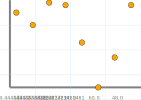

In [267]:
plt.show()

In [268]:
diction = Dict(:Hello => "25")

Dict{Symbol,String} with 1 entry:
  :Hello => "25"

In [269]:
push!(diction,(:Green => "32"))

Dict{Symbol,String} with 2 entries:
  :Hello => "25"
  :Green => "32"

In [270]:
for (key,data) in diction
    println(key)
    println(data)
end

Hello
25
Green
32


In [271]:
function GridLabels(x,y,grid,label,buffer=20)
   frame = grid.frame
    divamountx = grid.division_amountx
    total = divamountx
    topx = maximum(x)
    topy = maximum(y)
    xlabels = []
    while total < (divamountx * grid.divisions)
        xpercentage =  total / frame.width
        curr_label = topy * xpercentage
        push!(xlabels,(curr_label, total))
        total += divamountx
    end
    xtags = ""
    for (key,data) in xlabels
        textlabel = Label(string(key), 40, data,:gray,3)
        xtags = string(xtags, textlabel.tag)
    end
    tag = xtags
    ()->(tag;xtags)
end
function Grid(divisions,frame=Frame(1280,720,0mm,0mm,0mm,0mm),colorx=:lightblue,colory=:lightblue,thickness=.2)
    xlen = frame.width
    ylen = frame.height
    division_amountx = xlen / divisions
    division_amounty = ylen / divisions
    total = 0
    Xexpression = "(context(), "
    while total < xlen
        total = total + division_amountx
        linedraw = Line([(0,total),(xlen,total)],:lightblue,thickness)
        exp = linedraw.update(:This_symbol_means_nothing)
        Xexpression = string(Xexpression,string(exp))
    end
    Xexpression = string(Xexpression, "),")
    total = 0
    Yexpression = "(context(),"
    while total < ylen
        total = total + division_amounty
        println(total)
        linedraw = Line([(total,0),(total,ylen)],:lightblue,thickness)
        exp = linedraw.update(:hi)
        Yexpression = string(Yexpression,string(exp))
    end
    composexp = string(string(Xexpression), string(Yexpression),"),")
    vv = Meta.parse(string("compose(context(),",composexp,")"))
    composition = eval(vv)
    save(name) = draw(SVG(name), composition);
    update() = string(composexp)
    show() = composition
    tag() = composexp
    (var)->(update;composexp;show;save;tag;division_amountx;division_amounty;frame;divisions)
end

Grid (generic function with 5 methods)

In [272]:
plt = _arrayscatter(x,y,Circle(.5,.5,15,:blue))

240.0
480.0
720.0
objects: (context(),circle(148.75,90.0,15), fill("blue"), stroke("black"),circle(297.5,180.0,15), fill("blue"), stroke("black"),circle(446.25,18.0,15), fill("blue"), stroke("black"),circle(595.0,36.0,15), fill("blue"), stroke("black"),circle(743.75,306.0,15), fill("blue"), stroke("black"),circle(892.5,630.0,15), fill("blue"), stroke("black"),circle(1041.25,414.0,15), fill("blue"), stroke("black"),circle(1190.0,36.0,15), fill("blue"), stroke("black"),(context(),line([(90, 630),(1190, 630),]), stroke("lightblue"), linewidth(2mm),line([(90, 0),(90, 630),]), stroke("lightblue"), linewidth(2mm),),),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), circle(148.75, 90.0, 15), fill("blue"), stroke("black"), circle(297.5, 180.0, 15), fill("blue"), stroke("black"), circle(446.25, 18.0, 15), fill("blue"), stroke("black"), circle(595.0, 36.0, 15), fill("blue"), stroke("black"), circle(743.75, 306.0, 15), fill("blue"), stroke("black"), circ

ErrorException: type String has no field tag

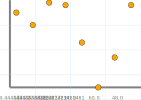

In [273]:
plt.show()

In [274]:
gls = GridLabels(x,y,Grid(6),:na)

120.0
240.0
360.0
480.0
600.0
720.0


#288 (generic function with 1 method)

objects: (context(),circle(148.75,90.0,25), fill("orange"), stroke("black"),circle(297.5,180.0,25), fill("orange"), stroke("black"),circle(446.25,18.0,25), fill("orange"), stroke("black"),circle(595.0,36.0,25), fill("orange"), stroke("black"),circle(743.75,306.0,25), fill("orange"), stroke("black"),circle(892.5,630.0,25), fill("orange"), stroke("black"),circle(1041.25,414.0,25), fill("orange"), stroke("black"),circle(1190.0,36.0,25), fill("orange"), stroke("black"),),(context(),(context(), line([(0, 180.0),(1280, 180.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 360.0),(1280, 360.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 540.0),(1280, 540.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 720.0),(1280, 720.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 900.0),(1280, 900.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1080.0),(1280, 1080.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1260.0),(1280, 1260.0),]), stroke("lightblue"), linewid

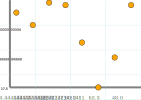

In [275]:
plt.add(gls)
plt.show()

In [276]:
println(y)

[5, 10, 1, 2, 17, 35, 23, 2]


In [277]:
function Grid(divisions,frame=Frame(1280,720,0mm,0mm,0mm,0mm),colorx=:lightblue,colory=:lightblue,thickness=.2)
    xlen = frame.width
    ylen = frame.height
    division_amountx = ylen / divisions
    division_amounty = xlen / divisions
    total = 0
    xvals = []
    Xexpression = "(context(), "
    while total < xlen
        total = total + division_amountx
        linedraw = Line([(0,total),(xlen,total)],:lightblue,thickness)
        exp = linedraw.update(:This_symbol_means_nothing)
        append!(xvals,total)
        Xexpression = string(Xexpression,string(exp))
    end
    Xexpression = string(Xexpression, "),")
    total = 0
    Yexpression = "(context(),"
    yvals = []
    while total < ylen
        total = total + division_amounty
        linedraw = Line([(total,0),(total,ylen)],:lightblue,thickness)
        exp = linedraw.update(:hi)
        append!(yvals,total)
        Yexpression = string(Yexpression,string(exp))
    end
    composexp = string(string(Xexpression), string(Yexpression),"),")
    vv = Meta.parse(string("compose(context(),",composexp,")"))
    tag = composexp
    composition = eval(vv)
    save(name) = draw(SVG(name), composition);
    update() = string(composexp)
    show() = composition
    (var)->(update;composexp;show;save;tag;frame;divisions;yvals;xvals)
end

Grid (generic function with 5 methods)

In [278]:
d = Grid(4)

#296 (generic function with 1 method)

In [279]:
frame = Frame(1280,720,0mm,0mm,0mm,0mm)

#71 (generic function with 1 method)

In [280]:
frame.add(d)

objects: (context(),(context(), line([(0, 180.0),(1280, 180.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 360.0),(1280, 360.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 540.0),(1280, 540.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 720.0),(1280, 720.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 900.0),(1280, 900.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1080.0),(1280, 1080.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1260.0),(1280, 1260.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1440.0),(1280, 1440.0),]), stroke("lightblue"), linewidth(0.2mm),),(context(),line([(320.0, 0),(320.0, 720),]), stroke("lightblue"), linewidth(0.2mm),line([(640.0, 0),(640.0, 720),]), stroke("lightblue"), linewidth(0.2mm),line([(960.0, 0),(960.0, 720),]), stroke("lightblue"), linewidth(0.2mm),),),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), (context(), line([(0, 180.0), (1280, 180.0)]), stroke

(Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), UnitBox{Int64,Int64,Int64,Int64}(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm), nothing, nothing, nothing, List([Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), nothing, nothing, nothing, nothing, List([Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), nothing, nothing, nothing, nothing, List([]), List([Compose.Form{Compose.LinePrimitive{Tuple{Measure,Measure}}}(Compose.LinePrimitive{Tuple{Measure,Measure}}[Compose.LinePrimitive{Tuple{Measure,Measure}}(Tuple{Measure,Measure}[(960.0cx, 0cy), (960.0cx, 720cy)])], Symbol("")), Compose.Form{

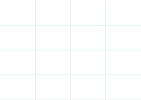

In [281]:
frame.show()

In [282]:
println(d.xvals)
println(d.yvals)

Any[180.0, 360.0, 540.0, 720.0, 900.0, 1080.0, 1260.0, 1440.0]
Any[320.0, 640.0, 960.0]


In [283]:
function GridLabels(x,y,grid,label,buffer=20)
    frame = grid.frame
    xvals = grid.xvals
    yvals = grid.yvals
    topy = maximum(y)
    topx = maximum(x)
    tag = "(context(), "
    for value in xvals
        lbl = value / frame.height * topy
        grlbl = Label(string(lbl),buffer - 5, value)
        tag = string(tag,grlbl.tag)
    end
    for value in yvals
        lbl = value / frame.width * topx
        grlbl = Label(string(lbl),value, buffer - 5)
        tag = string(tag,grlbl.tag)
    end
    tag = string(tag,")),")
    composition = Meta.parse(tag)
    show() = eval(composition)
    ()->(tag;xtags;show)
end

GridLabels (generic function with 3 methods)

In [284]:
function _arrayscatter(x,y,shape=Circle(.5,.5,25),axiscolor=:lightblue,
     grid=Grid(4), frame=Frame(1280,720,0mm,0mm,0mm,0mm))
    buffer = 90
    fheight = frame.height - buffer
    fwidth = frame.width - buffer
   topx = maximum(x)
    topy = maximum(y)
    axisx = Line([(buffer,fheight), (fwidth,fheight)],axiscolor)
   axisx_tag = axisx.update([(-1,-1), (-1,1), (1,1)])
    axisy = Line([(buffer,0), (buffer,fheight)],axiscolor)
    axisy_tag = axisy.update([(0,0), (0,1), (0,1)])
    grid_tag = grid.update()
    ######
    ######
    expression = string("")
    # Coordinate parsing -------
    for (i, w) in zip(x, y)
        inputx = (i / topx) * fwidth
        inputy = (w / topy) * fheight
        exp = shape.update(inputx,inputy)
        expression = string(expression,string(exp))
    end
    expression = string(expression, "(context(),", axisx_tag, axisy_tag,"),")
    tt = transfertype(expression)
    frame.add(grid)
    frame.add(tt)
    glabels = GridLabels(x,y,grid, :null)
    frame.add(glabels)
    composition = eval(expression)
    show() = frame.show().0
    tree() = introspect(composition)
    save(name) = draw(SVG(name), composition);
    get_frame() = frame
    add(obj) = frame.add(obj)
    (var)->(show;composition;tree;save;get_frame;add;x;y)
end

LoadError: syntax: extra token "0.0" after end of expression

In [285]:
plt = _arrayscatter(x,y)

objects: (context(),circle(148.75,90.0,25), fill("orange"), stroke("black"),circle(297.5,180.0,25), fill("orange"), stroke("black"),circle(446.25,18.0,25), fill("orange"), stroke("black"),circle(595.0,36.0,25), fill("orange"), stroke("black"),circle(743.75,306.0,25), fill("orange"), stroke("black"),circle(892.5,630.0,25), fill("orange"), stroke("black"),circle(1041.25,414.0,25), fill("orange"), stroke("black"),circle(1190.0,36.0,25), fill("orange"), stroke("black"),(context(),line([(90, 630),(1190, 630),]), stroke("lightblue"), linewidth(2mm),line([(90, 0),(90, 630),]), stroke("lightblue"), linewidth(2mm),),),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), circle(148.75, 90.0, 25), fill("orange"), stroke("black"), circle(297.5, 180.0, 25), fill("orange"), stroke("black"), circle(446.25, 18.0, 25), fill("orange"), stroke("black"), circle(595.0, 36.0, 25), fill("orange"), stroke("black"), circle(743.75, 306.0, 25), fill("orange"), stroke("black

MethodError: MethodError: objects of type String are not callable

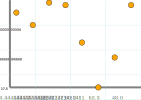

In [286]:
plt.show()

In [287]:
d = Grid(4)

#296 (generic function with 1 method)

In [288]:
lbls = GridLabels(x,y,d,:foo)

Base.Meta.ParseError: Base.Meta.ParseError("extra token \")\" after end of expression")

In [289]:
frame = Frame(1280,720,0mm,0mm,0mm,0mm)
frame.add(lbls)

objects: (context(),Core.Box("text(15,180.0,\"8.75\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,360.0,\"17.5\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,540.0,\"26.25\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,720.0,\"35.0\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,900.0,\"43.75\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,1080.0,\"52.5\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,1260.0,\"61.25\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,1440.0,\"70.0\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(320.0,15,\"10.0\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(640.0,15,\"20.0\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(960.0,15,\"30.0\",hcenter, vcenter), fontsize(5), fill(\"gray\"),")),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), Core.Box("text(15,180.0,\"8.75\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,360.0,\"17

MethodError: MethodError: no method matching compose(::Context, ::Core.Box)
Closest candidates are:
  compose(::Context, ::Any, !Matched::Any, !Matched::Any...) at /home/emmett/.julia/packages/Compose/Opbga/src/container.jl:321
  compose(::Context) at /home/emmett/.julia/packages/Compose/Opbga/src/container.jl:324
  compose(::Context, !Matched::Compose.ComposeNode) at /home/emmett/.julia/packages/Compose/Opbga/src/container.jl:300
  ...

In [290]:
frame.show()

In [291]:
println(lbls.tag)

Core.Box("text(15,180.0,\"8.75\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,360.0,\"17.5\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,540.0,\"26.25\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,720.0,\"35.0\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,900.0,\"43.75\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,1080.0,\"52.5\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,1260.0,\"61.25\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,1440.0,\"70.0\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(320.0,15,\"10.0\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(640.0,15,\"20.0\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(960.0,15,\"30.0\",hcenter, vcenter), fontsize(5), fill(\"gray\"),")


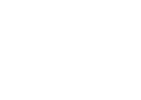

In [292]:
lbls.show()

In [293]:
function GridLabels(x,y,grid,label,buffer=20)
    frame = grid.frame
    xvals = grid.xvals
    yvals = grid.yvals
    topy = maximum(y)
    topx = maximum(x)
    tag = ""
    for value in xvals
        lbl = value / frame.height * topy
        grlbl = Label(string(lbl),buffer - 5, value)
        tag = string(tag,grlbl.tag)
    end
    for value in yvals
        lbl = value / frame.width * topx
        grlbl = Label(string(lbl),value, buffer - 5)
        tag = string(tag,grlbl.tag)
    end
    show() = eval(Meta.parse(string("compose(context(), ", tag, ")")))
    ()->(tag;xtags;show)
end

GridLabels (generic function with 3 methods)

In [294]:
lbls = GridLabels(x,y,d,:foo)

#304 (generic function with 1 method)

In [295]:
println(lbls.tag)

Core.Box("text(15,180.0,\"8.75\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,360.0,\"17.5\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,540.0,\"26.25\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,720.0,\"35.0\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,900.0,\"43.75\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,1080.0,\"52.5\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,1260.0,\"61.25\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(15,1440.0,\"70.0\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(320.0,15,\"10.0\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(640.0,15,\"20.0\",hcenter, vcenter), fontsize(5), fill(\"gray\"),text(960.0,15,\"30.0\",hcenter, vcenter), fontsize(5), fill(\"gray\"),")


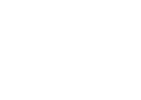

In [296]:
lbls.show()

In [297]:
function Label(label,x,y,stroke="",size=5,fill=:gray)
    if stroke != ""
        stroke = string("stroke(","\"",string(stroke),"\"","),")
    end
    fill = string("\"", string(fill), "\"")
    label = string("\"",string(label),"\"")
    tag = string("text(",x, ",", y, ",", label, ",hcenter, vcenter),",
           stroke," fontsize(", size, "), fill(", fill, "),")
    expression = string("compose(context(), ",tag,")")
    exp = Meta.parse(expression)
    show() = eval(exp)
    update() = tag
    (var)->(show;expression;tag;exp)
end

Label (generic function with 4 methods)

In [298]:
plt = _arrayscatter(x,y)

objects: (context(),circle(148.75,90.0,25), fill("orange"), stroke("black"),circle(297.5,180.0,25), fill("orange"), stroke("black"),circle(446.25,18.0,25), fill("orange"), stroke("black"),circle(595.0,36.0,25), fill("orange"), stroke("black"),circle(743.75,306.0,25), fill("orange"), stroke("black"),circle(892.5,630.0,25), fill("orange"), stroke("black"),circle(1041.25,414.0,25), fill("orange"), stroke("black"),circle(1190.0,36.0,25), fill("orange"), stroke("black"),(context(),line([(90, 630),(1190, 630),]), stroke("lightblue"), linewidth(2mm),line([(90, 0),(90, 630),]), stroke("lightblue"), linewidth(2mm),),),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), circle(148.75, 90.0, 25), fill("orange"), stroke("black"), circle(297.5, 180.0, 25), fill("orange"), stroke("black"), circle(446.25, 18.0, 25), fill("orange"), stroke("black"), circle(595.0, 36.0, 25), fill("orange"), stroke("black"), circle(743.75, 306.0, 25), fill("orange"), stroke("black

MethodError: MethodError: objects of type String are not callable

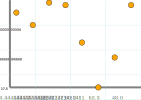

In [299]:
plt.show()

In [300]:
function Grid(divisions,frame=Frame(1280,720,0mm,0mm,0mm,0mm),colorx=:lightblue,colory=:lightblue,thickness=.2)
    xlen = frame.width
    ylen = frame.height
    division_amountx = ylen / divisions
    division_amounty = xlen / divisions
    total = 0
    xvals = []
    Xexpression = "(context(), "
    while total < xlen
        total = total + division_amountx
        linedraw = Line([(0,total),(xlen,total)],:lightblue,thickness)
        exp = linedraw.update(:This_symbol_means_nothing)
        append!(xvals,total)
        Xexpression = string(Xexpression,string(exp))
    end
    Xexpression = string(Xexpression, "),")
    total = 0
    Yexpression = "(context(),"
    yvals = []
    while total < ylen
        total = total + division_amounty
        linedraw = Line([(total,0),(total,ylen)],:lightblue,thickness)
        exp = linedraw.update(:hi)
        append!(yvals,total)
        Yexpression = string(Yexpression,string(exp))
    end
    composexp = string(string(Xexpression), string(Yexpression),"),")
    vv = Meta.parse(string("compose(context(),",composexp,")"))
    tag = composexp
    composition = eval(vv)
    save(name) = draw(SVG(name), composition);
    update() = string(composexp)
    show() = composition
    (var)->(update;composexp;show;save;tag;frame;divisions;yvals;xvals)
end

Grid (generic function with 5 methods)

In [301]:
fr = Frame(1280,720,0mm,0mm,0mm,0mm)

#71 (generic function with 1 method)

In [302]:
fr.add(Grid(4))

objects: (context(),(context(), line([(0, 180.0),(1280, 180.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 360.0),(1280, 360.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 540.0),(1280, 540.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 720.0),(1280, 720.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 900.0),(1280, 900.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1080.0),(1280, 1080.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1260.0),(1280, 1260.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1440.0),(1280, 1440.0),]), stroke("lightblue"), linewidth(0.2mm),),(context(),line([(320.0, 0),(320.0, 720),]), stroke("lightblue"), linewidth(0.2mm),line([(640.0, 0),(640.0, 720),]), stroke("lightblue"), linewidth(0.2mm),line([(960.0, 0),(960.0, 720),]), stroke("lightblue"), linewidth(0.2mm),),),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), (context(), line([(0, 180.0), (1280, 180.0)]), stroke

(Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), UnitBox{Int64,Int64,Int64,Int64}(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm), nothing, nothing, nothing, List([Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), nothing, nothing, nothing, nothing, List([Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), nothing, nothing, nothing, nothing, List([]), List([Compose.Form{Compose.LinePrimitive{Tuple{Measure,Measure}}}(Compose.LinePrimitive{Tuple{Measure,Measure}}[Compose.LinePrimitive{Tuple{Measure,Measure}}(Tuple{Measure,Measure}[(960.0cx, 0cy), (960.0cx, 720cy)])], Symbol("")), Compose.Form{

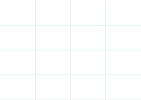

In [303]:
fr.show()

In [304]:
plt = _arrayscatter(x,y)

objects: (context(),circle(148.75,90.0,25), fill("orange"), stroke("black"),circle(297.5,180.0,25), fill("orange"), stroke("black"),circle(446.25,18.0,25), fill("orange"), stroke("black"),circle(595.0,36.0,25), fill("orange"), stroke("black"),circle(743.75,306.0,25), fill("orange"), stroke("black"),circle(892.5,630.0,25), fill("orange"), stroke("black"),circle(1041.25,414.0,25), fill("orange"), stroke("black"),circle(1190.0,36.0,25), fill("orange"), stroke("black"),(context(),line([(90, 630),(1190, 630),]), stroke("lightblue"), linewidth(2mm),line([(90, 0),(90, 630),]), stroke("lightblue"), linewidth(2mm),),),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), circle(148.75, 90.0, 25), fill("orange"), stroke("black"), circle(297.5, 180.0, 25), fill("orange"), stroke("black"), circle(446.25, 18.0, 25), fill("orange"), stroke("black"), circle(595.0, 36.0, 25), fill("orange"), stroke("black"), circle(743.75, 306.0, 25), fill("orange"), stroke("black

MethodError: MethodError: objects of type String are not callable

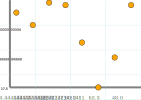

In [305]:
plt.show()

In [306]:
function _arrayscatter(x,y,shape=Circle(.5,.5,25),axiscolor=:lightblue,
     grid=Grid(3), frame=Frame(1280,720,0mm,0mm,0mm,0mm))
    buffer = 90
    fheight = frame.height - buffer
    fwidth = frame.width - buffer
   topx = maximum(x)
    topy = maximum(y)
    axisx = Line([(buffer,fheight), (fwidth,fheight)],axiscolor)
   axisx_tag = axisx.update([(-1,-1), (-1,1), (1,1)])
    axisy = Line([(buffer,0), (buffer,fheight)],axiscolor)
    axisy_tag = axisy.update([(0,0), (0,1), (0,1)])
    ######
    ######
    expression = string("")
    # Coordinate parsing -------
    for (i, w) in zip(x, y)
        inputx = (i / topx) * fwidth
        inputy = (w / topy) * fheight
        exp = shape.update(inputx,inputy)
        expression = string(expression,string(exp))
    end
    expression = string(expression, "(context(),", axisx_tag, axisy_tag,"),")
    tt = transfertype(expression)
    frame.add(tt)
    frame.add(grid)
    composition = eval(expression)
    show() = frame.show()
    tree() = introspect(composition)
    save(name) = draw(SVG(name), composition);
    get_frame() = frame
    add(obj) = frame.add(obj)
    (var)->(show;composition;tree;save;get_frame;add;x;y)
end

_arrayscatter (generic function with 6 methods)

In [307]:
plt = _arrayscatter(x,y)

objects: (context(),circle(148.75,90.0,25), fill("orange"), stroke("black"),circle(297.5,180.0,25), fill("orange"), stroke("black"),circle(446.25,18.0,25), fill("orange"), stroke("black"),circle(595.0,36.0,25), fill("orange"), stroke("black"),circle(743.75,306.0,25), fill("orange"), stroke("black"),circle(892.5,630.0,25), fill("orange"), stroke("black"),circle(1041.25,414.0,25), fill("orange"), stroke("black"),circle(1190.0,36.0,25), fill("orange"), stroke("black"),(context(),line([(90, 630),(1190, 630),]), stroke("lightblue"), linewidth(2mm),line([(90, 0),(90, 630),]), stroke("lightblue"), linewidth(2mm),),),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), circle(148.75, 90.0, 25), fill("orange"), stroke("black"), circle(297.5, 180.0, 25), fill("orange"), stroke("black"), circle(446.25, 18.0, 25), fill("orange"), stroke("black"), circle(595.0, 36.0, 25), fill("orange"), stroke("black"), circle(743.75, 306.0, 25), fill("orange"), stroke("black

#316 (generic function with 1 method)

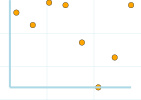

In [308]:
plt.show()

In [309]:
function _arrayscatter(x,y,shape=Circle(.5,.5,25),
        features = [Grid(3), Axis(:X), Axis(:Y)],
        frame=Frame(1280,720,0mm,0mm,0mm,0mm), 
        buffer = 90)
    fheight = frame.height - buffer
    fwidth = frame.width - buffer
    topx = maximum(x)
    topy = maximum(y)
    expression = string("")
    # Coordinate parsing -------
    for (i, w) in zip(x, y)
        inputx = (i / topx) * fwidth
        inputy = (w / topy) * fheight
        exp = shape.update(inputx,inputy)
        expression = string(expression,string(exp));
    end
    points = transfertype(expression);
    frame.add(points);
    for feature in features
        frame.add(feature);
    end
    composition = eval(expression);
    show() = frame.show()
    tree() = introspect(composition)
    save(name) = draw(SVG(name), composition);
    get_frame() = frame
    add(obj) = frame.add(obj)
    (var)->(show;composition;tree;save;get_frame;add;x;y;points)
end

_arrayscatter (generic function with 6 methods)

In [310]:
function Axis(orientation=:X, axiscolor = :gray, frame=Frame(1280,720,0mm,0mm,0mm,0mm), buffer = 90)
    if orientation == :X
        pairs = [(buffer,frame.height - buffer), (frame.width,frame.height - buffer)]
    else orientation == :Y
        pairs = [(buffer,0),(buffer, frame.height - buffer)]
    end
    axis = Line(pairs,axiscolor)
    tag = axis.update([pairs])
    (var)->(tag)
end

Axis (generic function with 5 methods)

In [311]:
plt = _arrayscatter(x,y);

objects: (context(),circle(148.75,90.0,25), fill("orange"), stroke("black"),circle(297.5,180.0,25), fill("orange"), stroke("black"),circle(446.25,18.0,25), fill("orange"), stroke("black"),circle(595.0,36.0,25), fill("orange"), stroke("black"),circle(743.75,306.0,25), fill("orange"), stroke("black"),circle(892.5,630.0,25), fill("orange"), stroke("black"),circle(1041.25,414.0,25), fill("orange"), stroke("black"),circle(1190.0,36.0,25), fill("orange"), stroke("black"),),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), circle(148.75, 90.0, 25), fill("orange"), stroke("black"), circle(297.5, 180.0, 25), fill("orange"), stroke("black"), circle(446.25, 18.0, 25), fill("orange"), stroke("black"), circle(595.0, 36.0, 25), fill("orange"), stroke("black"), circle(743.75, 306.0, 25), fill("orange"), stroke("black"), circle(892.5, 630.0, 25), fill("orange"), stroke("black"), circle(1041.25, 414.0, 25), fill("orange"), stroke("black"), circle(1190.0, 36.0, 

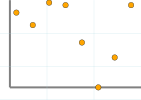

In [312]:
plt.show()

In [313]:
using Compose: mm

In [314]:
export mm

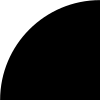

In [315]:
for i in 1:10
    IJulia.clear_output(true)
    draw(SVGJS(100mm, 100mm),  compose(context(0.001,0.001,1,1),circle(1,1, i/10)))
    sleep(1)
end

In [316]:
function Points(x, y, frame=Frame(1280,720,0mm,0mm,0mm,0mm), buffer = 90, shape=Circle(.5, .5, 25))
    fheight = frame.height - buffer
    fwidth = frame.width - buffer
    topx = maximum(x)
    topy = maximum(y)
   tag = string("")
    # Coordinate parsing -------
    for (i, w) in zip(x, y)
        inputx = (i / topx) * fwidth
        inputy = (w / topy) * fheight
        exp = shape.update(inputx,inputy)
        tag = string(tag,string(exp))
    end
    tag = string(tag)
    show() = eval(Meta.parse(string("compose(context(), ", tag,")")))
    (var) -> (tag)
end

Points (generic function with 4 methods)

In [317]:
h = Points(x,y)

#332 (generic function with 1 method)

In [318]:
typeof(h.tag)

Core.Box

In [319]:
fr.add(h)

objects: (context(),(context(), line([(0, 180.0),(1280, 180.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 360.0),(1280, 360.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 540.0),(1280, 540.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 720.0),(1280, 720.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 900.0),(1280, 900.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1080.0),(1280, 1080.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1260.0),(1280, 1260.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1440.0),(1280, 1440.0),]), stroke("lightblue"), linewidth(0.2mm),),(context(),line([(320.0, 0),(320.0, 720),]), stroke("lightblue"), linewidth(0.2mm),line([(640.0, 0),(640.0, 720),]), stroke("lightblue"), linewidth(0.2mm),line([(960.0, 0),(960.0, 720),]), stroke("lightblue"), linewidth(0.2mm),),),(context(),Core.Box("circle(148.75,90.0,25), fill(\"orange\"), stroke(\"black\"),circle(297.5,180.0,25), fill(\"orange\"), stroke(\"black\"),circ

MethodError: MethodError: no method matching compose(::Context, ::Core.Box)
Closest candidates are:
  compose(::Context, ::Any, !Matched::Any, !Matched::Any...) at /home/emmett/.julia/packages/Compose/Opbga/src/container.jl:321
  compose(::Context) at /home/emmett/.julia/packages/Compose/Opbga/src/container.jl:324
  compose(::Context, !Matched::Compose.ComposeNode) at /home/emmett/.julia/packages/Compose/Opbga/src/container.jl:300
  ...

In [320]:
function _arrayscatter(x, y,
        shape=Circle(.5,.5,25),
        features = [Grid(3), Axis(:X), Axis(:Y)],
        buffer = 90,
        frame=Frame(1280,720,0mm,0mm,0mm,0mm), 
        )
    points = Points(x, y, frame, buffer, shape)
    frame.add(points)
    for feature in features
        frame.add(feature);
    end
    show() = frame.show()
    tree() = introspect(composition)
    save(name) = draw(SVG(name), composition);
    get_frame() = frame
    add(obj) = frame.add(obj)
    (var)->(show;composition;tree;save;get_frame;add;x;y;points)
end

_arrayscatter (generic function with 6 methods)

## Double click to reveal Frame reference code
using Compose
function Frame(width, height, lm, rm, tm, bm)
    base = string("compose(context(units=UnitBox(0,0,",
    width, ",",
    height, ",",
    lm, ",", rm,",",
    tm, ",", bm,
        ")),")
    objects = []
    tag = base
    composition = nothing
    add(object) = composition,objects,tag = _frameup(base,objects,object)
    show() = composition
    tree() = introspect(composition)
    save(name) = draw(SVG(name), composition)
    (var)->(add;show;tag;base;objects;composition;save;tree;width;height;lm;bm;rm;tm)
end
function _frameup(tag,objects,object)
    push!(objects, object.tag)
    objecttags = ""
    for o in objects
       objecttags = string(objecttags,"(context(),",o, "),")
    end
    tag = string(tag,objecttags,")")
    exp = Meta.parse(tag)
    println(exp)
    composition = eval(exp)
    return(composition,objects,tag)
end

In [321]:
b = _arrayscatter(x,y)

objects: (context(),Core.Box("circle(148.75,90.0,25), fill(\"orange\"), stroke(\"black\"),circle(297.5,180.0,25), fill(\"orange\"), stroke(\"black\"),circle(446.25,18.0,25), fill(\"orange\"), stroke(\"black\"),circle(595.0,36.0,25), fill(\"orange\"), stroke(\"black\"),circle(743.75,306.0,25), fill(\"orange\"), stroke(\"black\"),circle(892.5,630.0,25), fill(\"orange\"), stroke(\"black\"),circle(1041.25,414.0,25), fill(\"orange\"), stroke(\"black\"),circle(1190.0,36.0,25), fill(\"orange\"), stroke(\"black\"),")),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), Core.Box("circle(148.75,90.0,25), fill(\"orange\"), stroke(\"black\"),circle(297.5,180.0,25), fill(\"orange\"), stroke(\"black\"),circle(446.25,18.0,25), fill(\"orange\"), stroke(\"black\"),circle(595.0,36.0,25), fill(\"orange\"), stroke(\"black\"),circle(743.75,306.0,25), fill(\"orange\"), stroke(\"black\"),circle(892.5,630.0,25), fill(\"orange\"), stroke(\"black\"),circle(1041.25,414.0,2

MethodError: MethodError: no method matching compose(::Context, ::Core.Box)
Closest candidates are:
  compose(::Context, ::Any, !Matched::Any, !Matched::Any...) at /home/emmett/.julia/packages/Compose/Opbga/src/container.jl:321
  compose(::Context) at /home/emmett/.julia/packages/Compose/Opbga/src/container.jl:324
  compose(::Context, !Matched::Compose.ComposeNode) at /home/emmett/.julia/packages/Compose/Opbga/src/container.jl:300
  ...

In [322]:
b.show()

UndefVarError: UndefVarError: b not defined

In [323]:
function Points(x, y, frame=Frame(1280,720,0mm,0mm,0mm,0mm), buffer = 90, shape=Circle(.5, .5, 25))
    fheight = frame.height - buffer
    fwidth = frame.width - buffer
    topx = maximum(x)
    topy = maximum(y)
   tag = string("")
    # Coordinate parsing -------
    for (i, w) in zip(x, y)
        inputx = (i / topx) * fwidth
        inputy = (w / topy) * fheight
        exp = shape.update(inputx,inputy)
        tag = string(tag,string(exp))
    end
    show() = eval(Meta.parse(string("compose(context(), ", tag,")")))
    (var)->(tag;show)
end

Points (generic function with 4 methods)

In [324]:
h = Points(x,y)

#342 (generic function with 1 method)

In [325]:
h.tag

Core.Box("circle(148.75,90.0,25), fill(\"orange\"), stroke(\"black\"),circle(297.5,180.0,25), fill(\"orange\"), stroke(\"black\"),circle(446.25,18.0,25), fill(\"orange\"), stroke(\"black\"),circle(595.0,36.0,25), fill(\"orange\"), stroke(\"black\"),circle(743.75,306.0,25), fill(\"orange\"), stroke(\"black\"),circle(892.5,630.0,25), fill(\"orange\"), stroke(\"black\"),circle(1041.25,414.0,25), fill(\"orange\"), stroke(\"black\"),circle(1190.0,36.0,25), fill(\"orange\"), stroke(\"black\"),")

In [326]:
typeof(h.tag)

Core.Box

In [327]:
function Points(x, y, frame=Frame(1280,720,0mm,0mm,0mm,0mm), buffer = 90, shape=Circle(.5, .5, 25))
    fheight = frame.height - buffer
    fwidth = frame.width - buffer
    topx = maximum(x)
    topy = maximum(y)
   express = string("")
    # Coordinate parsing -------
    for (i, w) in zip(x, y)
        inputx = (i / topx) * fwidth
        inputy = (w / topy) * fheight
        exp = shape.update(inputx,inputy)
        express = string(express,string(exp))
    end
    tag = express
    show() = eval(Meta.parse(string("compose(context(), ", tag,")")))
    (var)->(tag;show)
end

Points (generic function with 4 methods)

In [328]:
gr = Grid(4)

#311 (generic function with 1 method)

In [329]:
h = Points(x,y)
println(typeof(h.tag))

String


In [330]:
typeof(gr.tag)

String

In [331]:
function Grid(divisions,frame=Frame(1280,720,0mm,0mm,0mm,0mm),colorx=:lightblue,colory=:lightblue,thickness=.2)
    xlen = frame.width
    ylen = frame.height
    division_amountx = xlen / divisions
    division_amounty = ylen / divisions
    total = 0
    Xexpression = "(context(), "
    while total < xlen
        total = total + division_amountx
        linedraw = Line([(0,total),(xlen,total)],:lightblue,thickness)
        exp = linedraw.update(:This_symbol_means_nothing)
        Xexpression = string(Xexpression,string(exp))
    end
    Xexpression = string(Xexpression, "),")
    total = 0
    Yexpression = "(context(),"
    while total < ylen
        total = total + division_amounty
        println(total)
        linedraw = Line([(total,0),(total,ylen)],:lightblue,thickness)
        exp = linedraw.update(:hi)
        Yexpression = string(Yexpression,string(exp))
    end
    composexp = string(string(Xexpression), string(Yexpression),"),")
    vv = Meta.parse(string("compose(context(),",composexp,")"))
    composition = eval(vv)
    save(name) = draw(SVG(name), composition);
    update() = string(composexp)
    show() = composition
    tag() = composexp
    (var)->(update;composexp;show;save;tag;division_amountx;division_amounty;frame;divisions)
end

Grid (generic function with 5 methods)

In [332]:
function _arrayscatter(x, y,
        shape=Circle(.5,.5,25),
        features = [Grid(3), Axis(:X), Axis(:Y)],
        buffer = 90,
        frame=Frame(1280,720,0mm,0mm,0mm,0mm), 
        )
    points = Points(x, y, frame, buffer, shape)
    frame.add(points)
    for feature in features
        frame.add(feature);
    end
    show() = frame.show()
    tree() = introspect(composition)
    save(name) = draw(SVG(name), composition);
    get_frame() = frame
    add(obj) = frame.add(obj)
    (var)->(show;composition;tree;save;get_frame;add;x;y;points)
end

_arrayscatter (generic function with 6 methods)

In [333]:
plt = _arrayscatter(x,y)

240.0
480.0
720.0
objects: (context(),circle(148.75,90.0,25), fill("orange"), stroke("black"),circle(297.5,180.0,25), fill("orange"), stroke("black"),circle(446.25,18.0,25), fill("orange"), stroke("black"),circle(595.0,36.0,25), fill("orange"), stroke("black"),circle(743.75,306.0,25), fill("orange"), stroke("black"),circle(892.5,630.0,25), fill("orange"), stroke("black"),circle(1041.25,414.0,25), fill("orange"), stroke("black"),circle(1190.0,36.0,25), fill("orange"), stroke("black"),),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), circle(148.75, 90.0, 25), fill("orange"), stroke("black"), circle(297.5, 180.0, 25), fill("orange"), stroke("black"), circle(446.25, 18.0, 25), fill("orange"), stroke("black"), circle(595.0, 36.0, 25), fill("orange"), stroke("black"), circle(743.75, 306.0, 25), fill("orange"), stroke("black"), circle(892.5, 630.0, 25), fill("orange"), stroke("black"), circle(1041.25, 414.0, 25), fill("orange"), stroke("black"), cir

UndefVarError: UndefVarError: tag not defined

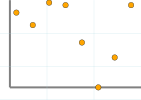

In [334]:
plt.show()

In [335]:
function Grid(divisions,frame=Frame(1280,720,0mm,0mm,0mm,0mm),colorx=:lightblue,colory=:lightblue,thickness=.2)
    xlen = frame.width
    ylen = frame.height
    division_amountx = xlen / divisions
    division_amounty = ylen / divisions
    total = 0
    Xexpression = "(context(), "
    while total < xlen
        total = total + division_amountx
        linedraw = Line([(0,total),(xlen,total)],:lightblue,thickness)
        exp = linedraw.update(:This_symbol_means_nothing)
        Xexpression = string(Xexpression,string(exp))
    end
    Xexpression = string(Xexpression, "),")
    total = 0
    Yexpression = "(context(),"
    while total < ylen
        total = total + division_amounty
        println(total)
        linedraw = Line([(total,0),(total,ylen)],:lightblue,thickness)
        exp = linedraw.update(:hi)
        Yexpression = string(Yexpression,string(exp))
    end
    composexp = string(string(Xexpression), string(Yexpression),"),")
    vv = Meta.parse(string("compose(context(),",composexp,")"))
    composition = eval(vv)
    save(name) = draw(SVG(name), composition);
    update() = string(composexp)
    show() = composition
    tag = composexp
    (var)->(update;composexp;show;save;tag;division_amountx;division_amounty;frame;divisions)
end

Grid (generic function with 5 methods)

In [336]:
fr = Frame(1280,720,0mm,0mm,0mm,0mm)

#71 (generic function with 1 method)

In [337]:
fr.add(Grid(4))

180.0
360.0
540.0
720.0
objects: (context(),(context(), line([(0, 320.0),(1280, 320.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 640.0),(1280, 640.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 960.0),(1280, 960.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1280.0),(1280, 1280.0),]), stroke("lightblue"), linewidth(0.2mm),),(context(),line([(180.0, 0),(180.0, 720),]), stroke("lightblue"), linewidth(0.2mm),line([(360.0, 0),(360.0, 720),]), stroke("lightblue"), linewidth(0.2mm),line([(540.0, 0),(540.0, 720),]), stroke("lightblue"), linewidth(0.2mm),line([(720.0, 0),(720.0, 720),]), stroke("lightblue"), linewidth(0.2mm),),),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), (context(), line([(0, 320.0), (1280, 320.0)]), stroke("lightblue"), linewidth(0.2mm), line([(0, 640.0), (1280, 640.0)]), stroke("lightblue"), linewidth(0.2mm), line([(0, 960.0), (1280, 960.0)]), stroke("lightblue"), linewidth(0.2mm), line([(0, 1280.0), 

(Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), UnitBox{Int64,Int64,Int64,Int64}(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm), nothing, nothing, nothing, List([Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), nothing, nothing, nothing, nothing, List([Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), nothing, nothing, nothing, nothing, List([]), List([Compose.Form{Compose.LinePrimitive{Tuple{Measure,Measure}}}(Compose.LinePrimitive{Tuple{Measure,Measure}}[Compose.LinePrimitive{Tuple{Measure,Measure}}(Tuple{Measure,Measure}[(720.0cx, 0cy), (720.0cx, 720cy)])], Symbol("")), Compose.Form{

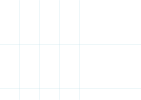

In [338]:
fr.show()

In [339]:
function GridLabels(x,y,grid,label = "X",buffer=20)
   frame = grid.frame
    divamountx = grid.division_amountx
    total = divamountx
    topx = maximum(x)
    topy = maximum(y)
    xlabels = []
    while total < (divamountx * grid.divisions)
        xpercentage = frame.width / total
        curr_label = topx * xpercentage
        push!(xlabels,(curr_label, total))
        total += divamountx
    end
    xtags = ""
    for (key,data) in xlabels
        textlabel = Label(string(key), data, frame.height - 15)
        xtags = string(xtags, textlabel.tag)
    end
    tag = xtags
    ()->(tag;xtags)
end

GridLabels (generic function with 3 methods)

In [340]:
function _arrayscatter(x, y,
        shape=Circle(.5,.5,25),
        grid = Grid(4),
        features = [Axis(:X), Axis(:Y)],
        buffer = 90,
        frame=Frame(1280,720,0mm,0mm,0mm,0mm), 
        )
    points = Points(x, y, frame, buffer, shape)
    frame.add(points)
#    glabels = GridLabels(x,y, grid)
    frame.add(grid)
#    frame.add(glabels)
    for feature in features
        frame.add(feature);
    end
    show() = frame.show()
    tree() = introspect(composition)
    save(name) = draw(SVG(name), composition);
    get_frame() = frame
    add(obj) = frame.add(obj)
    (var)->(show;composition;tree;save;get_frame;add;x;y;points)
end

_arrayscatter (generic function with 6 methods)

In [341]:
plt = _arrayscatter(x,y)

180.0
360.0
540.0
720.0
objects: (context(),circle(148.75,90.0,25), fill("orange"), stroke("black"),circle(297.5,180.0,25), fill("orange"), stroke("black"),circle(446.25,18.0,25), fill("orange"), stroke("black"),circle(595.0,36.0,25), fill("orange"), stroke("black"),circle(743.75,306.0,25), fill("orange"), stroke("black"),circle(892.5,630.0,25), fill("orange"), stroke("black"),circle(1041.25,414.0,25), fill("orange"), stroke("black"),circle(1190.0,36.0,25), fill("orange"), stroke("black"),),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), circle(148.75, 90.0, 25), fill("orange"), stroke("black"), circle(297.5, 180.0, 25), fill("orange"), stroke("black"), circle(446.25, 18.0, 25), fill("orange"), stroke("black"), circle(595.0, 36.0, 25), fill("orange"), stroke("black"), circle(743.75, 306.0, 25), fill("orange"), stroke("black"), circle(892.5, 630.0, 25), fill("orange"), stroke("black"), circle(1041.25, 414.0, 25), fill("orange"), stroke("black"

#368 (generic function with 1 method)

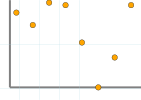

In [342]:
plt.show()

In [343]:
function Grid(divisions,frame=Frame(1280,720,0mm,0mm,0mm,0mm),colorx=:lightblue,colory=:lightblue,thickness=.2)
    xlen = frame.width
    ylen = frame.height
    division_amountx = ylen / divisions
    division_amounty = xlen / divisions
    total = 0
    Xexpression = "(context(), "
    while total < xlen
        total = total + division_amountx
        linedraw = Line([(0,total),(xlen,total)],:lightblue,thickness)
        exp = linedraw.update(:This_symbol_means_nothing)
        Xexpression = string(Xexpression,string(exp))
    end
    Xexpression = string(Xexpression, "),")
    total = 0
    Yexpression = "(context(),"
    while total < ylen
        total = total + division_amounty
        println(total)
        linedraw = Line([(total,0),(total,ylen)],:lightblue,thickness)
        exp = linedraw.update(:hi)
        Yexpression = string(Yexpression,string(exp))
    end
    composexp = string(string(Xexpression), string(Yexpression),"),")
    vv = Meta.parse(string("compose(context(),",composexp,")"))
    composition = eval(vv)
    save(name) = draw(SVG(name), composition);
    update() = string(composexp)
    show() = composition
    tag = composexp
    (var)->(update;composexp;show;save;tag;division_amountx;division_amounty;frame;divisions)
end

Grid (generic function with 5 methods)

In [344]:
fr = Frame(1280,720,0mm,0mm,0mm,0mm)

#71 (generic function with 1 method)

In [345]:
fr.add(Grid(3))

426.6666666666667
853.3333333333334
objects: (context(),(context(), line([(0, 240.0),(1280, 240.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 480.0),(1280, 480.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 720.0),(1280, 720.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 960.0),(1280, 960.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1200.0),(1280, 1200.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1440.0),(1280, 1440.0),]), stroke("lightblue"), linewidth(0.2mm),),(context(),line([(426.6666666666667, 0),(426.6666666666667, 720),]), stroke("lightblue"), linewidth(0.2mm),line([(853.3333333333334, 0),(853.3333333333334, 720),]), stroke("lightblue"), linewidth(0.2mm),),),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), (context(), line([(0, 240.0), (1280, 240.0)]), stroke("lightblue"), linewidth(0.2mm), line([(0, 480.0), (1280, 480.0)]), stroke("lightblue"), linewidth(0.2mm), line([(0, 720.0), (1280, 720.

(Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), UnitBox{Int64,Int64,Int64,Int64}(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm), nothing, nothing, nothing, List([Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), nothing, nothing, nothing, nothing, List([Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), nothing, nothing, nothing, nothing, List([]), List([Compose.Form{Compose.LinePrimitive{Tuple{Measure,Measure}}}(Compose.LinePrimitive{Tuple{Measure,Measure}}[Compose.LinePrimitive{Tuple{Measure,Measure}}(Tuple{Measure,Measure}[(853.3333333333334cx, 0cy), (853.3333333333334cx, 720cy)])], Sy

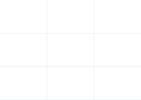

In [346]:
fr.show()

In [347]:
function _arrayscatter(x, y,
        shape=Circle(.5,.5,25),
        grid = Grid(4),
        features = [Axis(:X), Axis(:Y)],
        buffer = 90,
        frame=Frame(1280,720,0mm,0mm,0mm,0mm), 
        )
    points = Points(x, y, frame, buffer, shape)
    frame.add(points)
    glabels = GridLabels(x,y, grid)
    frame.add(grid)
    frame.add(glabels)
    for feature in features
        frame.add(feature);
    end
    show() = frame.show()
    tree() = introspect(composition)
    save(name) = draw(SVG(name), composition);
    get_frame() = frame
    add(obj) = frame.add(obj)
    (var)->(show;composition;tree;save;get_frame;add;x;y;points)
end

_arrayscatter (generic function with 6 methods)

In [348]:
plt = _arrayscatter(x,y)

320.0
640.0
960.0
objects: (context(),circle(148.75,90.0,25), fill("orange"), stroke("black"),circle(297.5,180.0,25), fill("orange"), stroke("black"),circle(446.25,18.0,25), fill("orange"), stroke("black"),circle(595.0,36.0,25), fill("orange"), stroke("black"),circle(743.75,306.0,25), fill("orange"), stroke("black"),circle(892.5,630.0,25), fill("orange"), stroke("black"),circle(1041.25,414.0,25), fill("orange"), stroke("black"),circle(1190.0,36.0,25), fill("orange"), stroke("black"),),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), circle(148.75, 90.0, 25), fill("orange"), stroke("black"), circle(297.5, 180.0, 25), fill("orange"), stroke("black"), circle(446.25, 18.0, 25), fill("orange"), stroke("black"), circle(595.0, 36.0, 25), fill("orange"), stroke("black"), circle(743.75, 306.0, 25), fill("orange"), stroke("black"), circle(892.5, 630.0, 25), fill("orange"), stroke("black"), circle(1041.25, 414.0, 25), fill("orange"), stroke("black"), cir

compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), circle(148.75, 90.0, 25), fill("orange"), stroke("black"), circle(297.5, 180.0, 25), fill("orange"), stroke("black"), circle(446.25, 18.0, 25), fill("orange"), stroke("black"), circle(595.0, 36.0, 25), fill("orange"), stroke("black"), circle(743.75, 306.0, 25), fill("orange"), stroke("black"), circle(892.5, 630.0, 25), fill("orange"), stroke("black"), circle(1041.25, 414.0, 25), fill("orange"), stroke("black"), circle(1190.0, 36.0, 25), fill("orange"), stroke("black")), (context(), (context(), line([(0, 180.0), (1280, 180.0)]), stroke("lightblue"), linewidth(0.2mm), line([(0, 360.0), (1280, 360.0)]), stroke("lightblue"), linewidth(0.2mm), line([(0, 540.0), (1280, 540.0)]), stroke("lightblue"), linewidth(0.2mm), line([(0, 720.0), (1280, 720.0)]), stroke("lightblue"), linewidth(0.2mm), line([(0, 900.0), (1280, 900.0)]), stroke("lightblue"), linewidth(0.2mm), line([(0, 1080.0), (1280, 1080.0)]), str

#380 (generic function with 1 method)

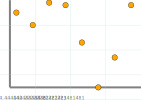

In [349]:
plt.show()

In [350]:
function GridLabels(x,y,grid,label = "X",buffer=20)
   frame = grid.frame
    divamountx = grid.division_amountx
    total = divamountx
    topx = maximum(x)
    topy = maximum(y)
    xlabels = []
    while total < (divamountx * grid.divisions)
        percentage = frame.height / total
        curr_label = topx * percentage
        push!(xlabels,(curr_label, total))
        total += divamountx
        print(total)
    end
    xtags = ""
    for (key,data) in xlabels
        textlabel = Label(string(round(key)), 40 , data, "", 3)
        xtags = string(xtags, textlabel.tag)
    end
    tag = xtags
    ()->(tag;xtags)
end

GridLabels (generic function with 3 methods)

320.0
640.0
960.0
objects: (context(),circle(148.75,90.0,25), fill("orange"), stroke("black"),circle(297.5,180.0,25), fill("orange"), stroke("black"),circle(446.25,18.0,25), fill("orange"), stroke("black"),circle(595.0,36.0,25), fill("orange"), stroke("black"),circle(743.75,306.0,25), fill("orange"), stroke("black"),circle(892.5,630.0,25), fill("orange"), stroke("black"),circle(1041.25,414.0,25), fill("orange"), stroke("black"),circle(1190.0,36.0,25), fill("orange"), stroke("black"),),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), circle(148.75, 90.0, 25), fill("orange"), stroke("black"), circle(297.5, 180.0, 25), fill("orange"), stroke("black"), circle(446.25, 18.0, 25), fill("orange"), stroke("black"), circle(595.0, 36.0, 25), fill("orange"), stroke("black"), circle(743.75, 306.0, 25), fill("orange"), stroke("black"), circle(892.5, 630.0, 25), fill("orange"), stroke("black"), circle(1041.25, 414.0, 25), fill("orange"), stroke("black"), cir

compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), circle(148.75, 90.0, 25), fill("orange"), stroke("black"), circle(297.5, 180.0, 25), fill("orange"), stroke("black"), circle(446.25, 18.0, 25), fill("orange"), stroke("black"), circle(595.0, 36.0, 25), fill("orange"), stroke("black"), circle(743.75, 306.0, 25), fill("orange"), stroke("black"), circle(892.5, 630.0, 25), fill("orange"), stroke("black"), circle(1041.25, 414.0, 25), fill("orange"), stroke("black"), circle(1190.0, 36.0, 25), fill("orange"), stroke("black")), (context(), (context(), line([(0, 180.0), (1280, 180.0)]), stroke("lightblue"), linewidth(0.2mm), line([(0, 360.0), (1280, 360.0)]), stroke("lightblue"), linewidth(0.2mm), line([(0, 540.0), (1280, 540.0)]), stroke("lightblue"), linewidth(0.2mm), line([(0, 720.0), (1280, 720.0)]), stroke("lightblue"), linewidth(0.2mm), line([(0, 900.0), (1280, 900.0)]), stroke("lightblue"), linewidth(0.2mm), line([(0, 1080.0), (1280, 1080.0)]), str

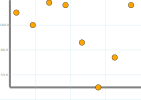

In [351]:
_arrayscatter(x,y).show()

In [352]:
println(x)

[5, 10, 15, 20, 25, 30, 35, 40]


In [353]:
round(5.5)

6.0

In [354]:
gr = Grid(4)

320.0
640.0
960.0


#375 (generic function with 1 method)

In [355]:
labels = GridLabels(x,y, gr)

360.0540.0720.0

#387 (generic function with 1 method)

In [356]:
fr = Frame(1280, 720, 0mm, 0mm, 0mm, 0mm)

#71 (generic function with 1 method)

In [357]:
fr.add(labels)

objects: (context(),text(40,180.0,"160.0",hcenter, vcenter), fontsize(3), fill("gray"),text(40,360.0,"80.0",hcenter, vcenter), fontsize(3), fill("gray"),text(40,540.0,"53.0",hcenter, vcenter), fontsize(3), fill("gray"),),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), text(40, 180.0, "160.0", hcenter, vcenter), fontsize(3), fill("gray"), text(40, 360.0, "80.0", hcenter, vcenter), fontsize(3), fill("gray"), text(40, 540.0, "53.0", hcenter, vcenter), fontsize(3), fill("gray")))


(Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), UnitBox{Int64,Int64,Int64,Int64}(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm), nothing, nothing, nothing, List([Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), nothing, nothing, nothing, nothing, List([]), List([Compose.Form{Compose.TextPrimitive{Tuple{Measures.Length{:cx,Int64},Measures.Length{:cy,Float64}},Rotation{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}},Tuple{Measures.Length{:mm,Float64},Measures.Length{:mm,Float64}}}}(Compose.TextPrimitive{Tuple{Measures.Length{:cx,Int64},Measures.Length{:cy,Float64}},Rotation{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}},Tuple{Measures.Length{:mm,Float64},Measures.Length{:mm,Float64}}}[Com

In [358]:
fr.add(gr)

objects: (context(),text(40,180.0,"160.0",hcenter, vcenter), fontsize(3), fill("gray"),text(40,360.0,"80.0",hcenter, vcenter), fontsize(3), fill("gray"),text(40,540.0,"53.0",hcenter, vcenter), fontsize(3), fill("gray"),),(context(),(context(), line([(0, 180.0),(1280, 180.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 360.0),(1280, 360.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 540.0),(1280, 540.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 720.0),(1280, 720.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 900.0),(1280, 900.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1080.0),(1280, 1080.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1260.0),(1280, 1260.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1440.0),(1280, 1440.0),]), stroke("lightblue"), linewidth(0.2mm),),(context(),line([(320.0, 0),(320.0, 720),]), stroke("lightblue"), linewidth(0.2mm),line([(640.0, 0),(640.0, 720),]), stroke("lightblue"), linewidth(0.2mm),line([(96

(Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), UnitBox{Int64,Int64,Int64,Int64}(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm), nothing, nothing, nothing, List([Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), nothing, nothing, nothing, nothing, List([Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), nothing, nothing, nothing, nothing, List([]), List([Compose.Form{Compose.LinePrimitive{Tuple{Measure,Measure}}}(Compose.LinePrimitive{Tuple{Measure,Measure}}[Compose.LinePrimitive{Tuple{Measure,Measure}}(Tuple{Measure,Measure}[(960.0cx, 0cy), (960.0cx, 720cy)])], Symbol("")), Compose.Form{

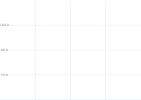

In [359]:
fr.show()

In [360]:
pts = Points(x,y, fr, 0)

#345 (generic function with 1 method)

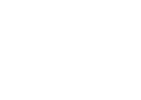

In [361]:
pts.show()

In [362]:
fr.add(pts)

objects: (context(),text(40,180.0,"160.0",hcenter, vcenter), fontsize(3), fill("gray"),text(40,360.0,"80.0",hcenter, vcenter), fontsize(3), fill("gray"),text(40,540.0,"53.0",hcenter, vcenter), fontsize(3), fill("gray"),),(context(),(context(), line([(0, 180.0),(1280, 180.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 360.0),(1280, 360.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 540.0),(1280, 540.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 720.0),(1280, 720.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 900.0),(1280, 900.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1080.0),(1280, 1080.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1260.0),(1280, 1260.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1440.0),(1280, 1440.0),]), stroke("lightblue"), linewidth(0.2mm),),(context(),line([(320.0, 0),(320.0, 720),]), stroke("lightblue"), linewidth(0.2mm),line([(640.0, 0),(640.0, 720),]), stroke("lightblue"), linewidth(0.2mm),line([(96

(Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), UnitBox{Int64,Int64,Int64,Int64}(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm), nothing, nothing, nothing, List([Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), nothing, nothing, nothing, nothing, List([]), List([Compose.Form{Compose.CirclePrimitive{Tuple{Measures.Length{:cx,Float64},Measures.Length{:cy,Float64}},Measures.Length{:cx,Int64}}}(Compose.CirclePrimitive{Tuple{Measures.Length{:cx,Float64},Measures.Length{:cy,Float64}},Measures.Length{:cx,Int64}}[Compose.CirclePrimitive{Tuple{Measures.Length{:cx,Float64},Measures.Length{:cy,Float64}},Measures.Length{:cx,Int64}}((1280.0cx, 41.14285714285714cy), 25cx)], Symbol("")), Compose.Form{Compose.CirclePrimitive{Tuple{Mea

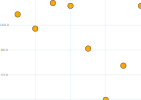

In [363]:
fr.show()

In [364]:
println(x)
println(y)

[5, 10, 15, 20, 25, 30, 35, 40]
[5, 10, 1, 2, 17, 35, 23, 2]


In [365]:
linex = [5,10,15,20]
liney = [5,10,15,20]
fr = Frame(1280,720,0mm,0mm,0mm,0mm)

#71 (generic function with 1 method)

In [366]:
pr = Points(linex, liney, fr)

#345 (generic function with 1 method)

objects: (context(),circle(297.5,157.5,25), fill("orange"), stroke("black"),circle(595.0,315.0,25), fill("orange"), stroke("black"),circle(892.5,472.5,25), fill("orange"), stroke("black"),circle(1190.0,630.0,25), fill("orange"), stroke("black"),),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), circle(297.5, 157.5, 25), fill("orange"), stroke("black"), circle(595.0, 315.0, 25), fill("orange"), stroke("black"), circle(892.5, 472.5, 25), fill("orange"), stroke("black"), circle(1190.0, 630.0, 25), fill("orange"), stroke("black")))


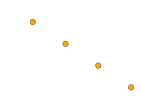

In [367]:
fr.add(pr)
fr.show()

In [368]:
# Needs to be flipped!
function Points(x, y, frame=Frame(1280,720,0mm,0mm,0mm,0mm), buffer = 90, shape=Circle(.5, .5, 25))
    fheight = frame.height - buffer
    fwidth = frame.width - buffer
    topx = maximum(x)
    topy = maximum(y)
   express = string("")
    # Coordinate parsing -------
    for (i, w) in zip(x, y)
        inputx = (i / topx) * fwidth
        inputy = (w / topy) * fheight
        inputx = fwidth - inputx
        println(inputx)
        exp = shape.update(inputx,inputy)
        express = string(express,string(exp))
    end
    tag = express
    show() = eval(Meta.parse(string("compose(context(), ", tag,")")))
    (var)->(tag;show)
end

Points (generic function with 4 methods)

In [369]:
pr = Points(linex, liney, fr)

892.5
595.0
297.5
0.0


#389 (generic function with 1 method)

objects: (context(),circle(892.5,157.5,25), fill("orange"), stroke("black"),circle(595.0,315.0,25), fill("orange"), stroke("black"),circle(297.5,472.5,25), fill("orange"), stroke("black"),circle(0.0,630.0,25), fill("orange"), stroke("black"),),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), circle(892.5, 157.5, 25), fill("orange"), stroke("black"), circle(595.0, 315.0, 25), fill("orange"), stroke("black"), circle(297.5, 472.5, 25), fill("orange"), stroke("black"), circle(0.0, 630.0, 25), fill("orange"), stroke("black")))
objects: (context(),circle(892.5,157.5,25), fill("orange"), stroke("black"),circle(595.0,315.0,25), fill("orange"), stroke("black"),circle(297.5,472.5,25), fill("orange"), stroke("black"),circle(0.0,630.0,25), fill("orange"), stroke("black"),),(context(),(context(), line([(0, 180.0),(1280, 180.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 360.0),(1280, 360.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 540.0)

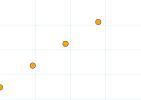

In [370]:
bam = Frame(1280,720,0mm,0mm,0mm,0mm)
bam.add(pr)
bam.add(d)
bam.show()

In [371]:
function GridLabels(x,y,grid,label = "X",buffer=20)
   frame = grid.frame
    divamountx = grid.division_amountx
    total = divamountx
    topx = maximum(x)
    topy = maximum(y)
    xlabels = []
    while total < (divamountx * grid.divisions)
        percentage = total / frame.height
        curr_label = topy * percentage
        push!(xlabels,(curr_label, frame.height - total))
        total += divamountx
        print(total)
    end
    xtags = ""
    for (key,data) in xlabels
        textlabel = Label(string(round(key)), 40 , data, "", 3)
        xtags = string(xtags, textlabel.tag)
    end
    tag = xtags
    ()->(tag;xtags)
end

GridLabels (generic function with 3 methods)

In [372]:
grlabels = GridLabels(linex, liney, Grid(4))
grid = Grid(4)

320.0
640.0
960.0
360.0540.0720.0320.0
640.0
960.0


#375 (generic function with 1 method)

objects: (context(),circle(892.5,157.5,25), fill("orange"), stroke("black"),circle(595.0,315.0,25), fill("orange"), stroke("black"),circle(297.5,472.5,25), fill("orange"), stroke("black"),circle(0.0,630.0,25), fill("orange"), stroke("black"),),(context(),(context(), line([(0, 180.0),(1280, 180.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 360.0),(1280, 360.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 540.0),(1280, 540.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 720.0),(1280, 720.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 900.0),(1280, 900.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1080.0),(1280, 1080.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1260.0),(1280, 1260.0),]), stroke("lightblue"), linewidth(0.2mm),line([(0, 1440.0),(1280, 1440.0),]), stroke("lightblue"), linewidth(0.2mm),),(context(),line([(320.0, 0),(320.0, 720),]), stroke("lightblue"), linewidth(0.2mm),line([(640.0, 0),(640.0, 720),]), stroke("lightblue"), lin

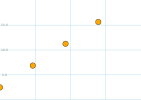

In [373]:
bam.add(grid)
bam.add(grlabels)
bam.show()

In [374]:
println(linex)
println(liney)

[5, 10, 15, 20]
[5, 10, 15, 20]


In [ ]:
function GridLabels(x,y,grid,label = "X",buffer=20)
   frame = grid.frame
    divamountx = grid.division_amountx
    total = divamountx
    topx = maximum(x)
    topy = maximum(y)
    xlabels = []
    while total < (divamountx * grid.divisions)
        percentage = total / frame.height
        curr_label = topy * percentage
        push!(xlabels,(curr_label, frame.height - total))
        total += divamountx
        print(total)
    end
    xtags = ""
    for (key,data) in xlabels
        textlabel = Label(string(round(key)), 40 , data, "", 3)
        xtags = string(xtags, textlabel.tag)
    end
    tag = xtags
    ()->(tag;xtags)
end

In [375]:
function Points(x, y, frame=Frame(1280,720,0mm,0mm,0mm,0mm), buffer = 90, shape=Circle(.5, .5, 25))
    fheight = frame.height - buffer
    fwidth = frame.width - buffer
    topx = maximum(x)
    topy = maximum(y)
   express = string("")
    # Coordinate parsing -------
    for (i, w) in zip(x, y)
        inputx = (i / topx) * fwidth
        inputy = (w / topy) * fheight
        inputx = fwidth - inputx
        println(inputx)
        println(inputy)
        exp = shape.update(inputx,inputy)
        express = string(express,string(exp))
    end
    tag = express
    show() = eval(Meta.parse(string("compose(context(), ", tag,")")))
    (var)->(tag;show)
end

Points (generic function with 4 methods)

In [385]:
fr = Frame(1280,720,0mm,0mm,0mm,0mm)
pts = Points(linex, liney, fr, 0)
grid = Grid(4)
lbls = GridLabels(linex,liney,grid)

960.0
180.0
640.0
360.0
320.0
540.0
0.0
720.0
320.0
640.0
960.0
360.0540.0720.0640.0960.01280.0

UndefVarError: UndefVarError: ytags not defined

In [386]:
fr.add(pts)
fr.add(lbls)
fr.add(grid)

objects: (context(),circle(960.0,180.0,25), fill("orange"), stroke("black"),circle(640.0,360.0,25), fill("orange"), stroke("black"),circle(320.0,540.0,25), fill("orange"), stroke("black"),circle(0.0,720.0,25), fill("orange"), stroke("black"),),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), circle(960.0, 180.0, 25), fill("orange"), stroke("black"), circle(640.0, 360.0, 25), fill("orange"), stroke("black"), circle(320.0, 540.0, 25), fill("orange"), stroke("black"), circle(0.0, 720.0, 25), fill("orange"), stroke("black")))
objects: (context(),circle(960.0,180.0,25), fill("orange"), stroke("black"),circle(640.0,360.0,25), fill("orange"), stroke("black"),circle(320.0,540.0,25), fill("orange"), stroke("black"),circle(0.0,720.0,25), fill("orange"), stroke("black"),),(context(),text(40,540.0,"5.0",hcenter, vcenter), fontsize(3), fill("gray"),text(40,360.0,"10.0",hcenter, vcenter), fontsize(3), fill("gray"),text(40,180.0,"15.0",hcenter, vcenter), fon

(Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), UnitBox{Int64,Int64,Int64,Int64}(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm), nothing, nothing, nothing, List([Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), nothing, nothing, nothing, nothing, List([Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), nothing, nothing, nothing, nothing, List([]), List([Compose.Form{Compose.LinePrimitive{Tuple{Measure,Measure}}}(Compose.LinePrimitive{Tuple{Measure,Measure}}[Compose.LinePrimitive{Tuple{Measure,Measure}}(Tuple{Measure,Measure}[(960.0cx, 0cy), (960.0cx, 720cy)])], Symbol("")), Compose.Form{

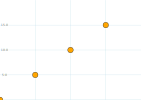

In [387]:
fr.show()

In [410]:
# Same thing on the X axis
function GridLabels(x,y,grid,label = "X",buffer=20)
    frame = grid.frame
    divamounty = grid.division_amounty
    divamountx = grid.division_amountx
    total = divamountx
    topx = maximum(x)
    topy = maximum(y)
    xlabels = []
    while total < (divamountx * grid.divisions)
        percentage = total / frame.height
        curr_label = topy * percentage
        push!(xlabels,(curr_label, frame.height - total))
        total += divamountx
    end
    xtags = ""
    for (key,data) in xlabels
        textlabel = Label(string(round(key)), 40 , data, "", 3)
        xtags = string(xtags, textlabel.tag)
    end
    # Ys
    total = divamounty
    ylabels = []
    while total < (divamounty * grid.divisions)
        percentage = total / frame.width
        curr_label = topx * percentage
        push!(ylabels,(curr_label, frame.width - total))
        total += divamounty
    end
    ytags = ""
    for (key,data) in ylabels
        textlabel = Label(string(round(key)), frame.width - data ,frame.height - 40 , "", 3)
        ytags = string(ytags, textlabel.tag)
    end
    tag = string(xtags,ytags)
    ()->(tag;xtags;ytags)
end

GridLabels (generic function with 3 methods)

In [411]:
fr = Frame(1280,720,0mm,0mm,0mm,0mm)
pts = Points(linex, liney, fr, 0)
grid = Grid(4)
lbls = GridLabels(linex,liney,grid)

960.0
180.0
640.0
360.0
320.0
540.0
0.0
720.0
320.0
640.0
960.0


#413 (generic function with 1 method)

In [412]:
fr.add(pts)
fr.add(lbls)
fr.add(grid)

objects: (context(),circle(960.0,180.0,25), fill("orange"), stroke("black"),circle(640.0,360.0,25), fill("orange"), stroke("black"),circle(320.0,540.0,25), fill("orange"), stroke("black"),circle(0.0,720.0,25), fill("orange"), stroke("black"),),
compose(context(units = UnitBox(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm)), (context(), circle(960.0, 180.0, 25), fill("orange"), stroke("black"), circle(640.0, 360.0, 25), fill("orange"), stroke("black"), circle(320.0, 540.0, 25), fill("orange"), stroke("black"), circle(0.0, 720.0, 25), fill("orange"), stroke("black")))
objects: (context(),circle(960.0,180.0,25), fill("orange"), stroke("black"),circle(640.0,360.0,25), fill("orange"), stroke("black"),circle(320.0,540.0,25), fill("orange"), stroke("black"),circle(0.0,720.0,25), fill("orange"), stroke("black"),),(context(),text(40,540.0,"5.0",hcenter, vcenter), fontsize(3), fill("gray"),text(40,360.0,"10.0",hcenter, vcenter), fontsize(3), fill("gray"),text(40,180.0,"15.0",hcenter, vcenter), fon

(Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), UnitBox{Int64,Int64,Int64,Int64}(0, 0, 1280, 720, 0.0mm, 0.0mm, 0.0mm, 0.0mm), nothing, nothing, nothing, List([Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), nothing, nothing, nothing, nothing, List([Context(Measures.BoundingBox{Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}},Tuple{Measures.Length{:w,Float64},Measures.Length{:h,Float64}}}((0.0w, 0.0h), (1.0w, 1.0h)), nothing, nothing, nothing, nothing, List([]), List([Compose.Form{Compose.LinePrimitive{Tuple{Measure,Measure}}}(Compose.LinePrimitive{Tuple{Measure,Measure}}[Compose.LinePrimitive{Tuple{Measure,Measure}}(Tuple{Measure,Measure}[(960.0cx, 0cy), (960.0cx, 720cy)])], Symbol("")), Compose.Form{

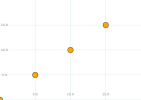

In [413]:
fr.show()

In [415]:
frame2 = Frame(1920,1080,0mm,0mm,0mm,0mm)

#71 (generic function with 1 method)

In [418]:
for i in 1:10
    IJulia.clear_output(true)
    draw(SVGJS("Hi.js",100mm, 100mm),  compose(context(0.001,0.001,1,1),circle(1,1, i/10)))
    sleep(1)
end